In [2]:
!pip install numpy
!pip install matplotlib
import numpy as np
import matplotlib.pyplot as plt


[notice] A new release of pip is available: 23.0.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Text(0, 0.5, 'Y values')

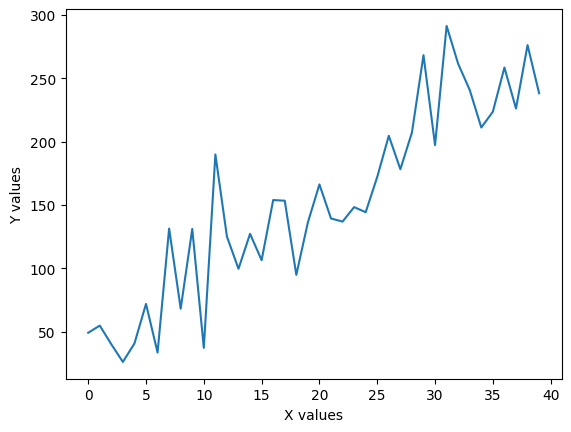

In [3]:
#read file in
file_path = 'data.v3.txt'
data_array = np.loadtxt(file_path)

#create arrays
array1 = data_array[:, 0] 
array2 = data_array[:, 1]  
array3 = data_array[:, 2] 

#plot graph
plt.plot(array1,array2, label='Plot')
plt.xlabel("X values")
plt.ylabel("Y values")

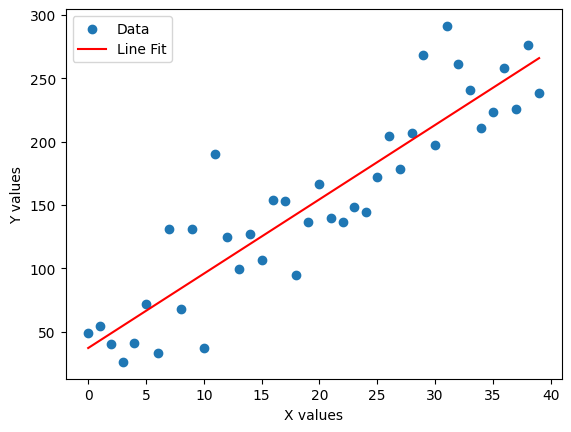

5.86478455909944
37.15417109756102


In [5]:
#fit a line to the data ignoring the uncertainty using polyfit
coefficients = np.polyfit(array1, array2, 1)
slope, intercept = coefficients

#create a line using the coefficients
line_fit = np.poly1d(coefficients)


#plot the graph
plt.scatter(array1, array2, label='Data')
plt.plot(array1, line_fit(array1), color='red', label='Line Fit')
plt.xlabel("X values")
plt.ylabel("Y values")
plt.legend()
plt.show()

# print the parameters
print(slope)
print(intercept)

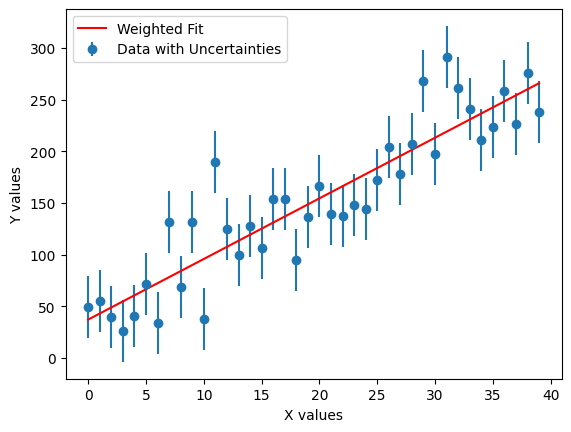

5.864784559099436
37.15417109756095


In [10]:
array1 = data_array[:, 0] 
array2 = data_array[:, 1]  
uncertainties = data_array[:, 2]

# calculate the weight of the data points
weights = 1.0 / uncertainties

# fit a line using the uncertainties
coefficients,_ = np.polyfit(array1, array2, 1, w=weights, cov=True)
slope, intercept = coefficients

# create a line
linefit = np.poly1d(coefficients)

#plot the data with error bars
plt.errorbar(array1, array2, yerr=uncertainties, fmt='o', label='Data with Uncertainties')

#plot the line
xrange = np.linspace(min(array1), max(array1))
plt.plot(xrange, linefit(xrange), color='red', label='Weighted Fit')
plt.xlabel("X values")
plt.ylabel("Y values")
plt.legend()
plt.show()

# Print the fit parameters
print(slope)
print(intercept)


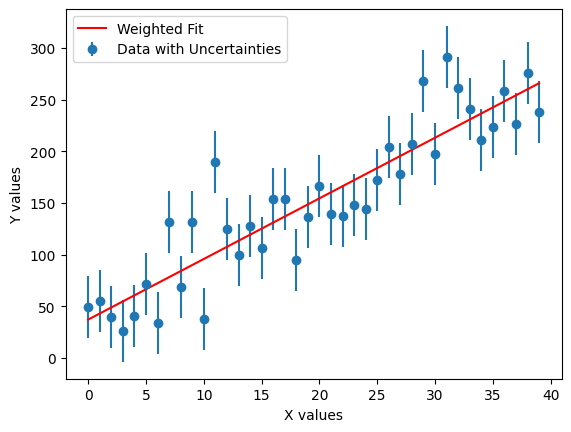

In [12]:
def fit_and_plot_line(x, y, dy):
    # calculate the weight of the data points
    weights = 1.0 / dy
    
    # fit a line using the uncertainties
    coefficients, _ = np.polyfit(x, y, 1, w=weights, cov=True)
    slope, intercept = coefficients
    
    # create a line
    linefit = np.poly1d(coefficients)
    
    #plot the data with error bars
    plt.errorbar(x, y, yerr=dy, fmt='o', label='Data with Uncertainties')
    
    #plot the line
    xrange = np.linspace(min(x), max(x))
    plt.plot(xrange, linefit(xrange), color='red', label='Weighted Fit')
    plt.xlabel("X values")
    plt.ylabel("Y values")
    plt.legend()
    plt.show()

fit_and_plot_line(array1, array2, uncertainties)

For the values I was given I feel like I did a good job of fitting a line to the data by using polyfit which takes the coefficients of the arrays and turns them into variables of slope and intercept. When it comes to the weighted fit it isn't any different than the normal fit because the uncertainties are all the same for every measurement.